In [29]:
%matplotlib inline
from IPython.display import Image, HTML

# data provided in json file 
import json 

import datetime

# process trees of Python abstract syntax grammar
import ast

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
#plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [9]:
df = pd.read_csv('movies.csv')
df.head().transpose()

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
tagline,NaN,Roll the dice and unleash the excitement!,Still Yelling. Still Fighting. Still Ready for...,Friends are the people who let you be yourself...,Just When His World Is Back To Normal... He's ...
description,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
genres,"animation, comedy, family","adventure, fantasy, family","romance, comedy","comedy, drama, romance",comedy
keywords,"jealousy, toy, boy, friendship, friends, rival...","board game, disappearance, based on children's...","fishing, best friend, duringcreditsstinger, ol...","based on novel, interracial relationship, sing...","baby, midlife crisis, confidence, aging, daugh..."
date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10
collection,Toy Story Collection,NaN,Grumpy Old Men Collection,NaN,Father of the Bride Collection
runtime,81,104,101,127,106
revenue,3.73554e+08,2.62797e+08,0,8.14522e+07,7.65789e+07


In [10]:
df.columns

Index(['id', 'title', 'tagline', 'description', 'genres', 'keywords', 'date',
       'collection', 'runtime', 'revenue', 'budget', 'director', 'cast',
       'production_companies', 'production_countries', 'popularity',
       'average_vote', 'num_votes', 'language', 'imdb_id', 'poster_url'],
      dtype='object')

In [11]:
df.shape

(46628, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46628 non-null  int64  
 1   title                 46624 non-null  object 
 2   tagline               20783 non-null  object 
 3   description           45633 non-null  object 
 4   genres                44104 non-null  object 
 5   keywords              31739 non-null  object 
 6   date                  46540 non-null  object 
 7   collection            4574 non-null   object 
 8   runtime               46360 non-null  float64
 9   revenue               46624 non-null  float64
 10  budget                46628 non-null  int64  
 11  director              45711 non-null  object 
 12  cast                  44137 non-null  object 
 13  production_companies  34346 non-null  object 
 14  production_countries  40132 non-null  object 
 15  popularity         

In [13]:
df[df['revenue']==0].shape

(39087, 21)

In [14]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [15]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(37575, 21)

In [16]:
# return is a better indicator of profit or loss
df['return'] = df['revenue']/df['budget']
df[df['return'].isnull()].shape

(41170, 22)

In [18]:
df['year'] = pd.to_datetime(df['date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [20]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_url'] = "<img src='" + base_poster_url + df['poster_url'] + "' style='height:100px;'>"

In [21]:
df['title'] = df['title'].astype('str')
df['description'] = df['description'].astype('str')

In [22]:
title_corpus = ' '.join(df['title'])
description_corpus = ' '.join(df['description'])

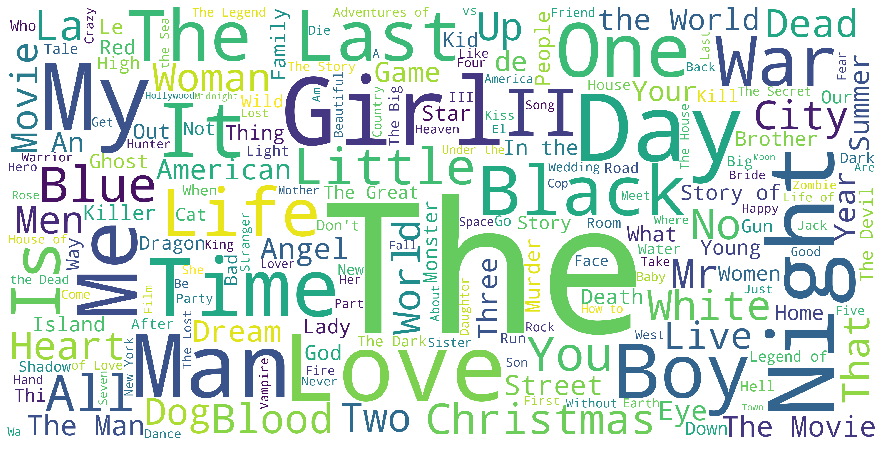

In [30]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()